In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_excel("ZScore_Normalized_TIME-WASTERS (2).xlsx")
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,Productivity,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,1.112882,Male,Pakistan,0.981599,True,True,Engineer,Rural,Instagram,...,-1.006976,1.006976,Procrastination,Smartphone,Android,21:00:00,-1.017757,1.017757,Commuting,Mobile Data
1,2,0.371652,Female,Mexico,-1.328813,False,True,Artist,Urban,Instagram,...,-0.064115,0.064115,Habit,Computer,Android,17:00:00,-0.045687,0.045687,At school,Wi-Fi
2,3,-0.666069,Female,United States,-0.720282,False,True,Engineer,Rural,Facebook,...,0.407316,-0.407316,Entertainment,Tablet,Android,14:00:00,0.440348,-0.440348,At home,Mobile Data
3,4,1.409373,Male,Brazil,0.144948,True,False,Waiting staff,Rural,YouTube,...,-1.006976,1.006976,Habit,Smartphone,Android,21:00:00,-1.017757,1.017757,Commuting,Mobile Data
4,5,-1.184929,Male,Pakistan,-1.577629,False,True,Manager,Urban,TikTok,...,1.350177,-1.350177,Boredom,Smartphone,iOS,08:00:00,1.412417,-1.412417,At home,Mobile Data


In [14]:

def age_group(z):
    if z < -1:
        return 'Teenagers'
    elif -1 <= z < 0:
        return 'Young Adults'
    elif 0 <= z < 1:
        return 'Adults'
    else:
        return 'Seniors'

df['Age Group'] = df['Age'].apply(age_group)

age_group_distribution = df['Age Group'].value_counts().reset_index()
age_group_distribution.columns = ['Age Group', 'Count']
age_group_distribution.to_csv("age_group_distribution.csv", index=False)


In [15]:
df['Watch Time (minutes)'] = pd.to_timedelta(df['Watch Time']).dt.total_seconds() / 60


usage_by_country = df.groupby('Location')['Watch Time (minutes)'].sum().sort_values(ascending=False).reset_index()

print("The countries that most use social media:\n")
print(usage_by_country)
usage_by_country.to_csv("social_media_usage_by_country.csv", index=False)

The countries that most use social media:

        Location  Watch Time (minutes)
0          India              230650.0
1  United States              181715.0
2         Brazil               82390.0
3    Philippines               81235.0
4        Vietnam               81020.0
5      Indonesia               79970.0
6       Pakistan               77670.0
7         Mexico               73935.0
8          Japan               72895.0
9        Germany               62190.0


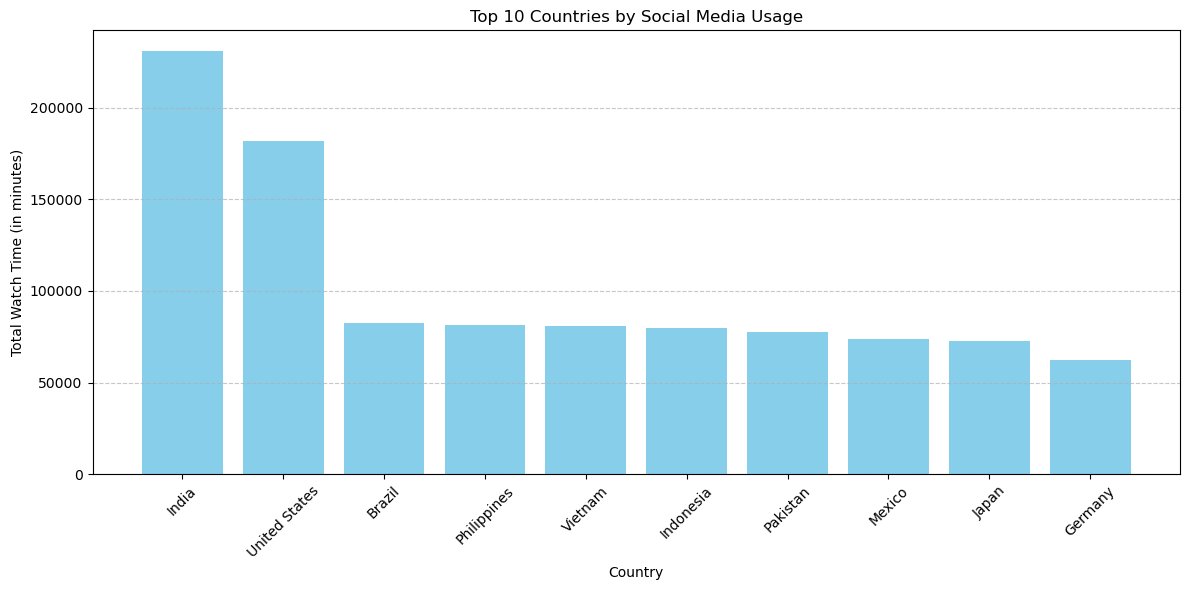

In [16]:
top_10 = usage_by_country.head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10['Location'], top_10['Watch Time (minutes)'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Watch Time (in minutes)')
plt.title('Top 10 Countries by Social Media Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

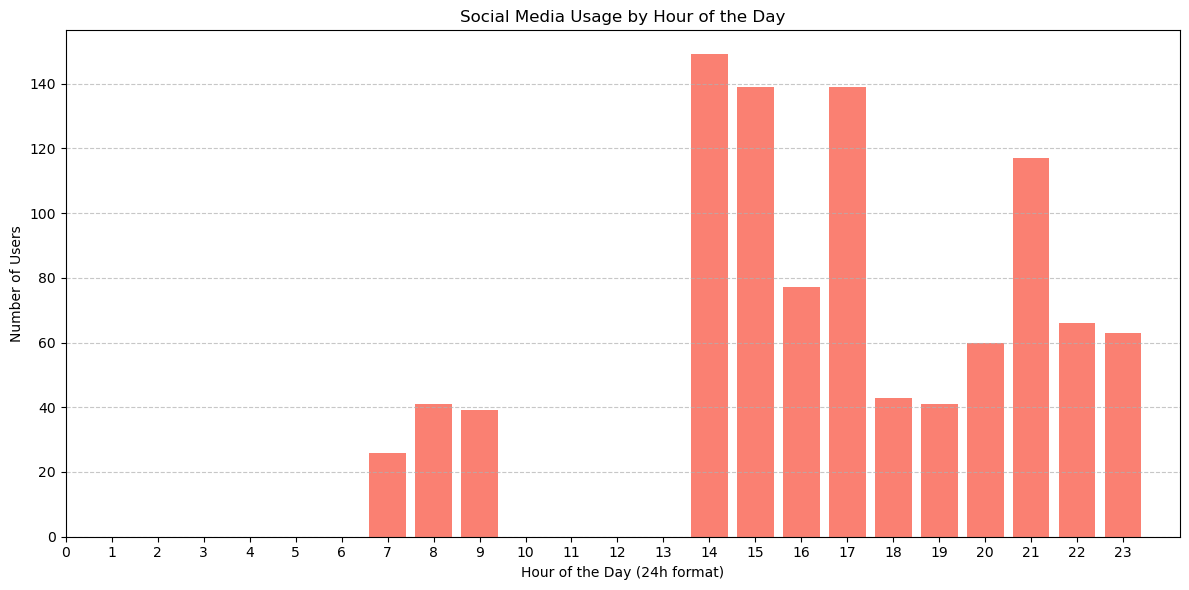

Top 5 hours with the most social media usage:
Watch Hour
14    149
15    139
17    139
21    117
16     77
Name: count, dtype: int64


In [17]:
df['Watch Hour'] = pd.to_datetime(df['Watch Time'], format='%H:%M:%S').dt.hour

# Count how many times each hour appears
hourly_usage = df['Watch Hour'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
plt.bar(hourly_usage.index, hourly_usage.values, color='salmon')
plt.xlabel('Hour of the Day (24h format)')
plt.ylabel('Number of Users')
plt.title('Social Media Usage by Hour of the Day')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Top 5 hours with the most social media usage:")
print(hourly_usage.sort_values(ascending=False).head(5))

In [18]:
hourly_usage.sort_values(ascending=False).reset_index().rename(columns={'index': 'Hour', 'Watch Hour': 'User Count'}).to_csv("social_media_usage_by_hour.csv", index=False)


In [19]:

profession_time_ranking = df.groupby('Profession')['Total Time Spent'].mean().reset_index()

profession_time_ranking = profession_time_ranking.sort_values(by='Total Time Spent', ascending=False)

profession_time_ranking.to_csv("profession_time_ranking.csv", index=False)

profession_time_ranking.head(10)


,Profession,Total Time Spent
1,Cashier,0.232233
3,Labor/Worker,0.048854
0,Artist,0.018743
4,Manager,0.012817
8,driver,-0.026670
6,Teacher,-0.028368
5,Students,-0.029400
7,Waiting staff,-0.046181
2,Engineer,-0.051592


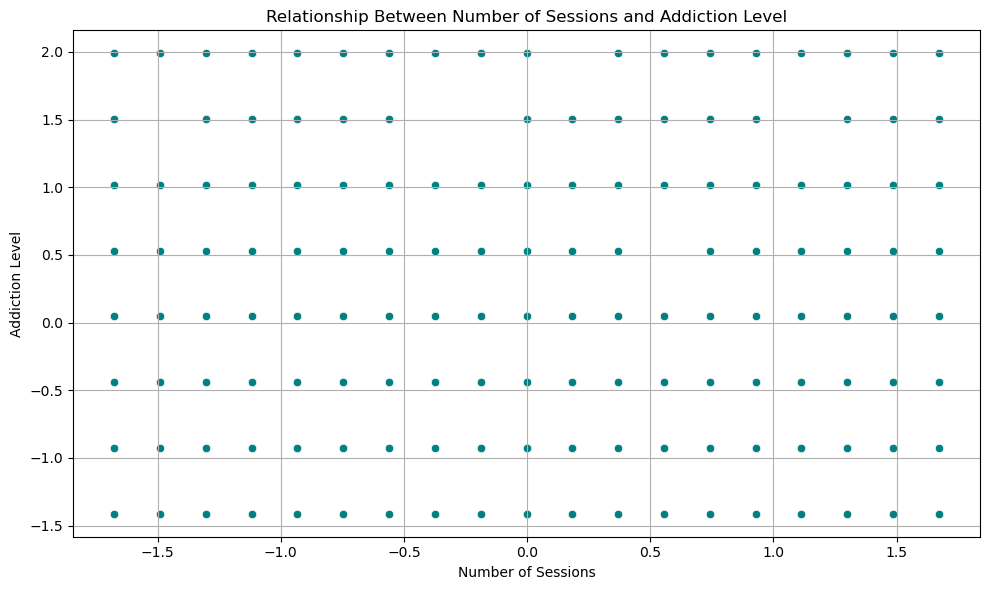

    Number of Sessions  Addiction Level
0            -1.676019         0.210592
1            -1.490063         0.087587
2            -1.304108         0.095537
3            -1.118152         0.142894
4            -0.932196         0.088890
5            -0.746240        -0.029087
6            -0.560285         0.213011
7            -0.374329        -0.215331
8            -0.188373         0.108692
9            -0.002417         0.015777
10            0.183538        -0.113668
11            0.369494         0.092421
12            0.555450        -0.162613
13            0.741406        -0.093180
14            0.927361        -0.001047
15            1.113317        -0.259114
16            1.299273        -0.073690
17            1.485229        -0.099089
18            1.671184         0.024086


In [20]:
f = df.dropna(subset=['Number of Sessions', 'Addiction Level'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number of Sessions', y='Addiction Level', color='teal')
plt.title('Relationship Between Number of Sessions and Addiction Level')
plt.xlabel('Number of Sessions')
plt.ylabel('Addiction Level')
plt.grid(True)
plt.tight_layout()
plt.show()
sessions_vs_addiction = df.groupby('Number of Sessions')['Addiction Level'].mean().reset_index()
print(sessions_vs_addiction)


sessions_vs_addiction.to_csv("sessions_vs_addiction.csv", index=False)



C:\Users\ayafo\AppData\Local\Temp\ipykernel_21324\1284479373.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reason_counts, y='Watch Reason', x='Count', palette='Set2')


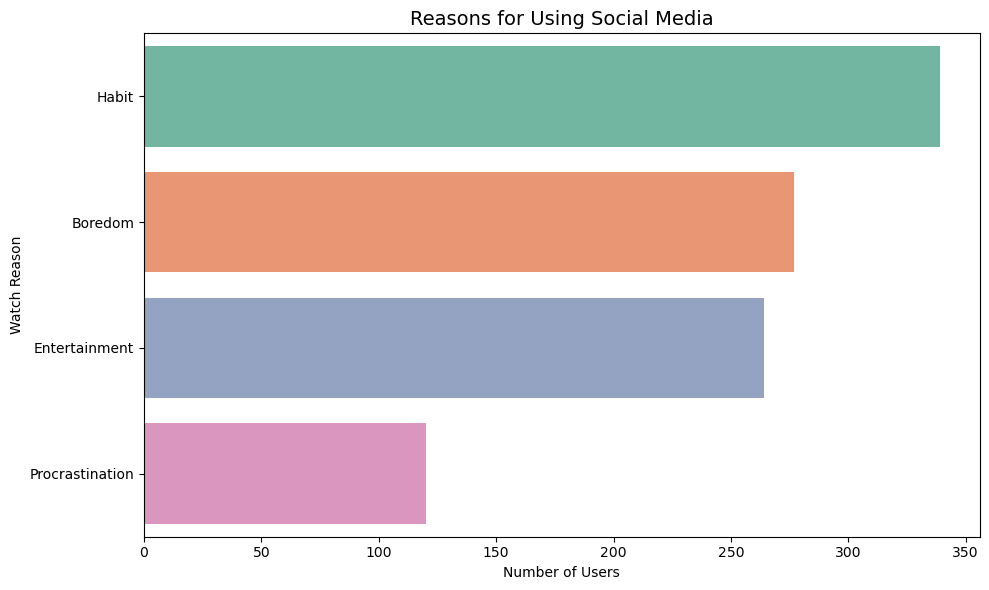

,Watch Reason,Count
0,Habit,339
1,Boredom,277
2,Entertainment,264
3,Procrastination,120


In [23]:
 
reason_counts = df['Watch Reason'].value_counts().reset_index()
reason_counts.columns = ['Watch Reason', 'Count']


reason_counts.to_csv("watch_reason_counts.csv", index=False )
plt.figure(figsize=(10, 6))
sns.barplot(data=reason_counts, y='Watch Reason', x='Count', palette='Set2')
plt.title('Reasons for Using Social Media', fontsize=14)
plt.xlabel('Number of Users')
plt.ylabel('Watch Reason')
plt.tight_layout()
plt.show()



reason_counts.head(10)


Average Scroll Rate by Addiction Level:
Addiction Level
 1.503792    0.187138
 0.531722    0.152424
-1.412417    0.023545
-0.440348    0.011337
 1.017757    0.002484
 1.989827   -0.042721
 0.045687   -0.066392
-0.926383   -0.109332
Name: Scroll Rate, dtype: float64


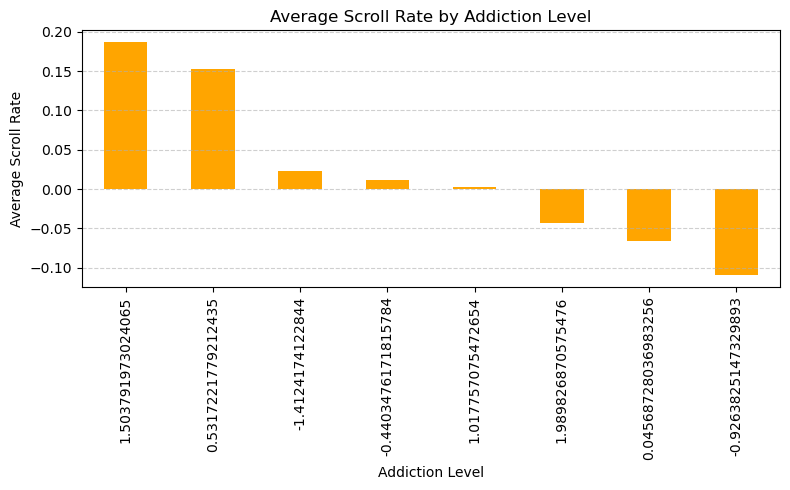

In [25]:
avg_scroll = df.groupby('Addiction Level')['Scroll Rate'].mean().sort_values(ascending=False)


print("Average Scroll Rate by Addiction Level:")
print(avg_scroll)


plt.figure(figsize=(8, 5))
avg_scroll.plot(kind='bar', color='orange')
plt.title('Average Scroll Rate by Addiction Level')
plt.xlabel('Addiction Level')
plt.ylabel('Average Scroll Rate')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
avg_scroll.reset_index().to_csv("scroll_vs_addiction.csv", index=False)

 Correlation between Addiction Level and other variables:
Satisfaction    0.994939
Productivity   -0.994939
Self Control   -1.000000
Name: Addiction Level, dtype: float64


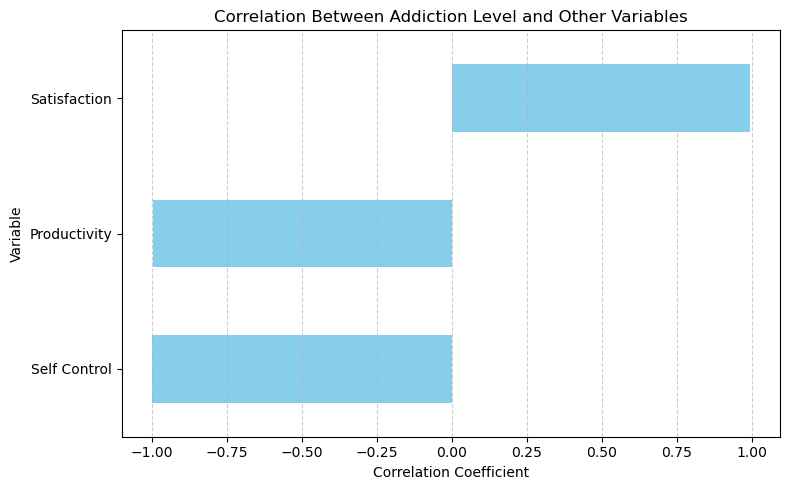

In [27]:
columns_to_check = [
    'Addiction Level',
    'Productivity',
    'Satisfaction',
    'Self Control'
]

df_corr = df[columns_to_check].dropna()


correlation_matrix = df_corr.corr()


addiction_corr = correlation_matrix['Addiction Level'].drop('Addiction Level')
print(" Correlation between Addiction Level and other variables:")
print(addiction_corr.sort_values(ascending=False))


addiction_corr.to_csv("addiction_relationships.csv")

plt.figure(figsize=(8, 5))
addiction_corr.sort_values().plot(kind='barh', color='skyblue')
plt.title("Correlation Between Addiction Level and Other Variables")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variable")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\ayafo\AppData\Local\Temp\ipykernel_21324\568906789.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered, x='Location', y='Total Time Spent', palette='pastel')


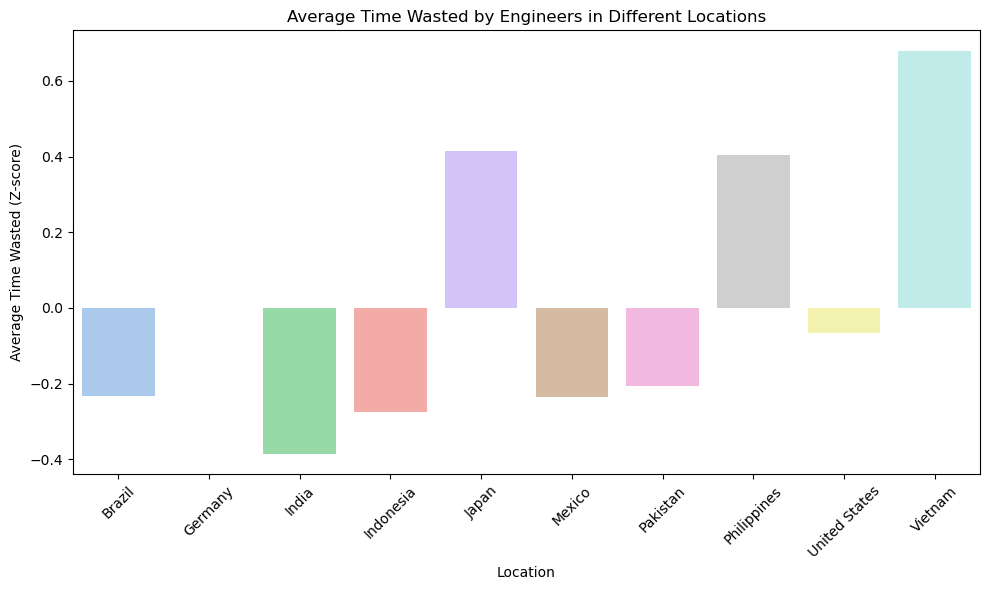

In [30]:
grouped = df.groupby(['Profession', 'Location'])['Total Time Spent'].mean().reset_index()
grouped.to_csv("time_by_profession_and_area.csv", index=False)

grouped.head(10)
fixed_profession = 'Engineer'
filtered = grouped[grouped['Profession'] == fixed_profession]


plt.figure(figsize=(10, 6))
sns.barplot(data=filtered, x='Location', y='Total Time Spent', palette='pastel')
plt.title(f'Average Time Wasted by {fixed_profession}s in Different Locations')
plt.xlabel('Location')
plt.ylabel('Average Time Wasted (Z-score)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
